<a href="https://colab.research.google.com/github/juathanduarte/cncomp/blob/main/CNCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **Função de Bisseção**

> Definir a função bisect que recebe como parâmetros a função f, o intervalo [a, b] e a precisão.

In [ ]:
f = lambda x: x**3 - 9*x + 5
a, b = 0.5, 1
precision = 0.01

In [ ]:
def bisect(f, a, b, precision):
    if f(a) * f(b) >= 0:
        print("Bisseção falhou")
        return None
    
    m = (a + b) / 2
    
    while abs(f(m)) >= precision:
        m = (a + b) / 2
        if f(m) == 0:
            return m
        if f(a) * f(m) < 0:
            b = m
        else:
            a = m
    return m



> Chamada do método da bissecção e printar a função com a raiz encontrada.



In [ ]:
root = bisect(f, a, b, precision)
print(f"Raiz encontrada: {root}")

Raiz encontrada: 0.578125


> Plotar a função e a raiz encontrada.

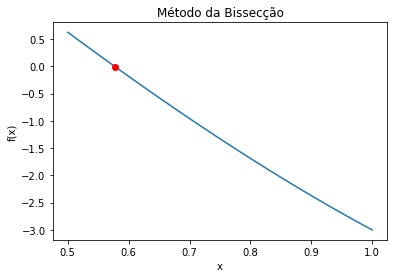

In [ ]:
x = np.linspace(a, b, 100)
y = f(x)
plt.plot(x, y)
plt.plot(root, f(root), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Método da Bissecção')
plt.show()

### **Função Falsa Posição**

> Definir a função falsePosition que recebe como parâmetros a função f, o intervalo [a, b] e a precisão.



In [11]:
f = lambda x: x**3 - 9*x + 5
a, b = 0, 1
precision = 0.0005

In [12]:
def falsePosition(f, a, b, precision):
    if f(a) * f(b) >= 0:
        print("Falsa posição falhou")
        return None
    
    while abs(b - a) >= precision:
        m = (a * f(b) - b * f(a)) / (f(b) - f(a))
        if f(m) == 0:
            return m
        if f(a) * f(m) < 0:
            b = m
        else:
            a = m
    return m

> Chamada do método da falsa posição e printar a função com a raiz encontrada.



In [13]:
root = falsePosition(f, a, b, precision)
print(f"Raiz encontrada: {root}")

Raiz encontrada: 0.5768875239163401




> Plotar a função e a raiz encontrada



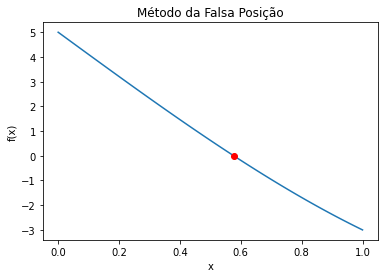

In [14]:
x = np.linspace(a, b, 100)
y = f(x)
plt.plot(x, y)
plt.plot(root, f(root), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Método da Falsa Posição')
plt.show()